<a href="https://colab.research.google.com/github/PadariyaDebo/CGAN-DCGAN-WGAN/blob/main/DP_CTGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/kasra-hosseini/privgem.git

Cloning into 'privgem'...
remote: Enumerating objects: 572, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 572 (delta 23), reused 17 (delta 17), pack-reused 544
Receiving objects: 100% (572/572), 180.48 KiB | 821.00 KiB/s, done.
Resolving deltas: 100% (303/303), done.


In [4]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install PuLP
!pip install networkx
!pip install dython
!pip install dython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.2 MB 26.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 56.7 MB/s 
     |████████████████████████████████| 944 kB 70.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
%cd /content/privgem
!pip install -v -e .

Streaming output truncated to the last 5000 lines.
  Found link https://files.pythonhosted.org/packages/8a/ed/91e5b224dfca8038088d1d6fabe542bef0edde65eee070a22e380d992821/Faker-0.7.16.tar.gz#sha256=caf24d57993f6915fcd3cde1b074afe98d31f7aa081f83156f0b6f816d7fbb85 (from https://pypi.org/simple/faker/), version: 0.7.16
  Found link https://files.pythonhosted.org/packages/75/dd/d4ca34551be2afc43dbbc26c6646aba97417d614a290f45fde256178dc2e/Faker-0.7.17-py2.py3-none-any.whl#sha256=1236c6dd61d1914d4972a1a1ffd3dba989f37d81b4ecb27c66fd2d241cfbf220 (from https://pypi.org/simple/faker/), version: 0.7.17
  Found link https://files.pythonhosted.org/packages/82/70/f387a7e062460c745da85d069c4f54a4d764498821f4c5565eeeb7ac710b/Faker-0.7.17.tar.gz#sha256=49cba0c3df3dac4fe5cf22d1a5799683c572172b9a0e94ec318e359339648a58 (from https://pypi.org/simple/faker/), version: 0.7.17
  Found link https://files.pythonhosted.org/packages/f4/74/a30a064b952e553fd1c5daabfff2422ca9a5abea8c696427b9c73bc4b4e8/Faker-0.7.18-p

In [1]:
!python -m ipykernel install --user --name privgem_py38 --display-name "Python (privgem_py38)"

Installed kernelspec privgem_py38 in /root/.local/share/jupyter/kernels/privgem_py38


In [7]:
# solve issue with autocomplete
%config Completer.use_jedi = False

%load_ext autoreload
%autoreload 2
%matplotlib inline

from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  


In [8]:
!pip install ctgan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import os
import pandas as pd
import sys

In [10]:
from ctgan import load_demo

data = load_demo()
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
discrete_columns = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country',
    'income']

In [12]:
from privgem import tabular_utils

path_save="./test_dpctgan/orig_data/orig_data.csv"
path_train="./test_dpctgan/orig_data/orig_train.csv"
path_test="./test_dpctgan/orig_data/orig_test.csv"

tabular_utils.split_save_orig_data(data,
                                   path_save=path_save,
                                   path_train=path_train,
                                   path_test=path_test,
                                   label_col="income",
                                   test_size=0.25,
                                   random_state=42)

[INFO] save the original file: /content/test_dpctgan/orig_data/orig_data.csv
[INFO] split dataset
[INFO] save the train set: ./test_dpctgan/orig_data/orig_train.csv
[INFO] save the test set: ./test_dpctgan/orig_data/orig_test.csv


In [13]:
from privgem import tabular_dpctgan

# inputs
epsilon = 1
sigma = 5
batch_size = 64
# default: 300
epochs = 10
output_save_path = "./test_dpctgan/dpctgan_training.csv"
device = "default" # or "default" or "cpu" or "cuda:1"

dp_model = tabular_dpctgan(verbose=True, 
                           epsilon=epsilon, 
                           batch_size=batch_size, 
                           sigma=sigma,
                           secure_rng=False,
                           epochs=epochs,
                           output_save_path=output_save_path,
                           device=device)

In [14]:
dp_model.train(data, discrete_columns)

The sample rate will be defined from ``batch_size`` and ``sample_size``.The returned privacy budget will be incorrect.
Secure RNG turned off. This is perfectly fine for experimentation as it allows for much faster training performance, but remember to turn it on and retrain one last time before production with ``secure_rng`` turned on.
Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


0 | 20.731703 | eps: 0.089841 (target: 1.000000) | G: 0.6420 | D: 1.4005 | Acc (fake): 0.0870 | Acc (true): 0.8598 | Acc (generator): 0.9132 | alpha: 63.0
1 | 42.048344 | eps: 0.094912 (target: 1.000000) | G: 0.6614 | D: 1.3929 | Acc (fake): 0.1308 | Acc (true): 0.9244 | Acc (generator): 0.8651 | alpha: 63.0
2 | 64.036047 | eps: 0.099983 (target: 1.000000) | G: 0.6331 | D: 1.4116 | Acc (fake): 0.0646 | Acc (true): 0.9175 | Acc (generator): 0.9361 | alpha: 63.0
3 | 85.358982 | eps: 0.105054 (target: 1.000000) | G: 0.6459 | D: 1.3934 | Acc (fake): 0.0312 | Acc (true): 0.9583 | Acc (generator): 0.9691 | alpha: 63.0
4 | 106.498164 | eps: 0.110125 (target: 1.000000) | G: 0.6442 | D: 1.3854 | Acc (fake): 0.0221 | Acc (true): 0.9596 | Acc (generator): 0.9751 | alpha: 63.0
5 | 128.480613 | eps: 0.115196 (target: 1.000000) | G: 0.6563 | D: 1.3725 | Acc (fake): 0.0596 | Acc (true): 0.9296 | Acc (generator): 0.9397 | alpha: 63.0
6 | 150.448601 | eps: 0.120267 (target: 1.000000) | G: 0.6410 | D: 1

---
DP-CTGAN
 epsilon: 1, sigma: 5, batch_size: 64
max iter: 9, eps: 0.135481
---
time/iter: 23.808s


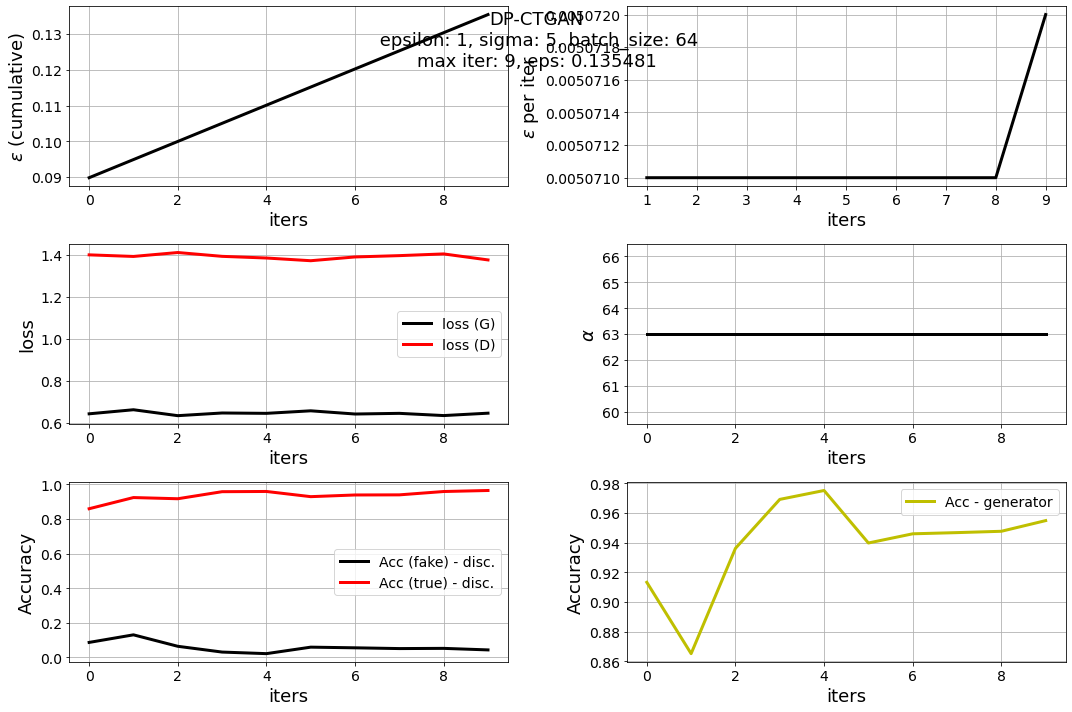

In [15]:
from privgem import tabular_utils

tabular_utils.plot_log_dpctgan(filename="./test_dpctgan/dpctgan_training.csv")

In [16]:
synth_output = dp_model.sample(len(data))

path2synth_file = "./test_dpctgan/dpctgan_001/synthetic_output.csv"
os.makedirs(os.path.dirname(path2synth_file), exist_ok=True)
synth_output.to_csv(path2synth_file, index=False)

synth_output

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,29,Private,263522,Bachelors,9,Divorced,Transport-moving,Husband,White,Male,-36,3,43,United-States,<=50K
1,27,Private,158568,Bachelors,8,Divorced,Transport-moving,Wife,White,Female,-18,2,43,United-States,<=50K
2,20,Private,186164,Bachelors,9,Divorced,Transport-moving,Husband,White,Female,25,-1,43,Hungary,<=50K
3,47,Private,146035,Bachelors,9,Divorced,Transport-moving,Husband,White,Female,-72,0,44,United-States,<=50K
4,28,Private,273596,Bachelors,9,Divorced,Transport-moving,Husband,White,Female,-89,1,44,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,24,Private,152697,Bachelors,9,Divorced,Transport-moving,Wife,White,Female,-15,1,43,United-States,<=50K
32557,32,Private,161786,Bachelors,4,Divorced,Transport-moving,Husband,White,Female,-37,0,43,Hong,>50K
32558,39,Private,185496,Bachelors,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,-44,3,43,United-States,<=50K
32559,27,Private,259371,Bachelors,9,Divorced,Transport-moving,Husband,White,Female,-7,3,19,United-States,<=50K
